## Contents

This notebook covers the basics of creating TransferFunction object, obtaining time and energy resolved responses, plotting them and using IO methods available. Finally, artificial responses are introduced which provide a way for quick testing.

## Setup

Set up some useful libraries.

In [39]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Import relevant stingray libraries.

In [40]:
from stingray.simulator.transfer import TransferFunction
from stingray.simulator.transfer import simple_ir, relativistic_ir

# Creating TransferFunction

A transfer function can be initialized by passing a 2-d array containing time across the first dimension and energy across the second. For example, if the 2-d array is defined by `arr`, then `arr[1][5]` defines a time of 5 units and energy of 1 unit.

For the purpose of this tutorial, we have stored a 2-d array in a text file named `intensity.txt`. The script to generate this file is explained in `Data Preparation` notebook.

In [41]:
response = np.loadtxt('intensity.txt')

Initialize transfer function by passing the array defined above.

In [42]:
transfer = TransferFunction(response)
transfer.data.shape

(524, 744)

By default, time and energy spacing across both axes are set to 1. However, they can be changed by supplying additional parameters `dt` and `de`.

# Obtaining Time-Resolved Response

The 2-d transfer function can be converted into a time-resolved/energy-averaged response.

In [43]:
transfer.time_response()

This sets `time` parameter which can be accessed by `transfer.time`

In [44]:
transfer.time[1:10]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

Additionally, energy interval over which to average, can be specified by specifying `e0` and `e1` parameters.

# Obtaining Energy-Resolved Response

Energy-resolved/time-averaged response can be also be formed from 2-d transfer function.

In [45]:
transfer.energy_response()

This sets `energy` parameter which can be accessed by `transfer.energy`

In [46]:
transfer.energy[1:10]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

# Plotting Responses

TransferFunction() creates plots of `time-resolved`, `energy-resolved` and `2-d responses`. These plots can be saved by setting `save` parameter. 

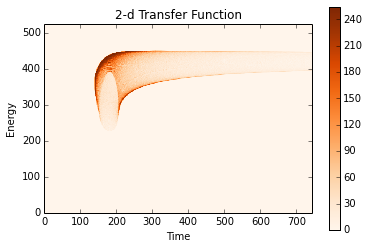

In [47]:
transfer.plot(response='2d')

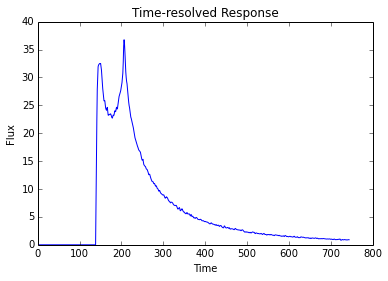

In [48]:
transfer.plot(response='time')

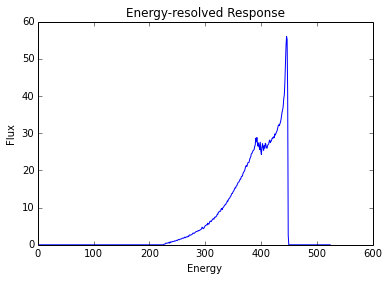

In [49]:
transfer.plot(response='energy')

By enabling `save=True` parameter, the plots can be also saved.

# IO

TransferFunction can be saved in pickle format and retrieved later.

In [50]:
transfer.write('transfer.pickle')

Saved files can be read using static `read()` method.

In [51]:
transfer_new = TransferFunction.read('transfer.pickle')
transfer_new.time[1:10]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

# Artificial Responses

For quick testing, two helper impulse response models are provided.

### 1- Simple IR

simple_ir() allows to define an impulse response of constant height. It takes in time resolution starting time, width and intensity as arguments.

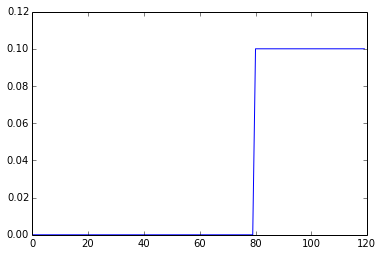

In [52]:
s_ir = simple_ir(dt=0.125, start=10, width=5, intensity=0.1)
plt.plot(s_ir)

### 2- Relativistic IR

A more realistic impulse response mimicking black hole dynamics can be created using relativistic_ir(). Its arguments are: time_resolution, primary peak time, secondary peak time, end time, primary peak value, secondary peak value, rise slope and decay slope. These paramaters are set to appropriate values by default.

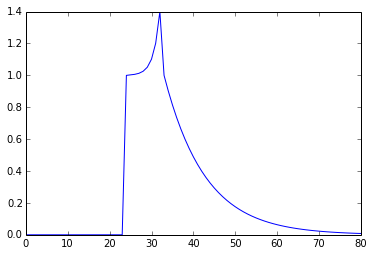

In [53]:
r_ir = relativistic_ir(dt=0.125)
plt.plot(r_ir)